In [1]:
#pip install skl2onnx
#pip install onnxmltools
#pip install pydotplus
#conda install python-graphviz

In [2]:
#import libraries
import pandas as pd
import joblib

In [3]:
# load that file
qualityWineDF = pd.read_csv("winequality-red.csv")
qualityWineDF

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
#drop rows with null values
qualityWineDF = qualityWineDF.dropna()
qualityWineDF.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [5]:
#drop duplicates
qualityWineDFCleaned = qualityWineDF.drop_duplicates()
qualityWineDFCleaned

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

In [6]:
qualityWineDFCleaned.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
qualityWineDFCleaned.to_csv("qualityWineDF.csv")

In [8]:
qualityWineDFCleaned["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [9]:
X = qualityWineDFCleaned.copy()
X.drop("quality", axis=1, inplace=True)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
5      9.4

In [10]:
# get the Y values = quality columm
#converting to a list of arrays
y = qualityWineDFCleaned['quality'].values.reshape(-1, 1)
y[:5]

array([[5],
       [5],
       [5],
       [6],
       [5]], dtype=int64)

In [11]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# import the StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

# make the instance of the standard scaler
scaler = StandardScaler()

In [13]:
# fit the scaler onto the data
X_scaler = scaler.fit(x_train)

In [14]:
# scale the x train and test using .transform function
xTrainScaled = X_scaler.transform(x_train)
xTestScaled = X_scaler.transform(x_test)

In [15]:
# use sklearn tree module to make the tree classifier
from sklearn import tree

In [16]:
# use .DecisionTreeClassifier from the tree module to make the tree classifier
treeModel = tree.DecisionTreeClassifier()

In [17]:
# fit the model onto our scaled X training data and the trained y data
treeModel = treeModel.fit(xTrainScaled, y_train)

In [18]:
# make the predictions using the testing data
predictedValues = treeModel.predict(xTestScaled)

In [19]:
# import the modules for the confusion matrix, accuracy score, and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"Accuracy Score: {(accuracyScore*100):.2f}%")

Accuracy Score: 49.71%


In [21]:
# confusion matrix
print(confusion_matrix(y_test, predictedValues))

[[ 0  0  1  0  1  0]
 [ 2  2  6  4  2  0]
 [ 1  5 79 44  8  0]
 [ 0  3 49 74 17  3]
 [ 0  2  4 17 14  0]
 [ 0  0  0  1  1  0]]


In [22]:
# classification report
print(classification_report(y_test, predictedValues))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.12      0.14        16
           5       0.57      0.58      0.57       137
           6       0.53      0.51      0.52       146
           7       0.33      0.38      0.35        37
           8       0.00      0.00      0.00         2

    accuracy                           0.50       340
   macro avg       0.26      0.26      0.26       340
weighted avg       0.50      0.50      0.50       340



In [23]:
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [24]:
# Create DOT data
dot_data = tree.export_graphviz(
    treeModel, out_file=None, feature_names=X.columns, class_names=["5","6","7","4","8","3"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [25]:
# Saving the tree as PDF
file_path = "decisionTree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "decisionTree.png"
graph.write_png(file_path)

True

Use a Random Forest Classifier to improve performance on the dataset


In [26]:
# import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [27]:
# create the random forest classifier model
rfModel = RandomForestClassifier(n_estimators=500, random_state=78)

In [28]:
# fit the model onto the scaled training data
rfModel = rfModel.fit(xTrainScaled, y_train)

C:\Users\Camilla\AppData\Local\Temp\ipykernel_18392\951295472.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfModel = rfModel.fit(xTrainScaled, y_train)


In [29]:
# make list of predicted values using the scaled test data
predictedValues = rfModel.predict(xTestScaled)

In [30]:
# Evaluate the model using the accuracy score, confusion matrix, and classification report
rfAccuracyScore = accuracy_score(y_test, predictedValues)

# display the accuracy score
print(f"Random Forest Accuracy Score: {(rfAccuracyScore * 100):.2f}")

Random Forest Accuracy Score: 57.65


In [31]:
# classification report
print(classification_report(y_test, predictedValues))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.62      0.71      0.66       137
           6       0.56      0.60      0.58       146
           7       0.43      0.32      0.37        37
           8       0.00      0.00      0.00         2

    accuracy                           0.58       340
   macro avg       0.27      0.27      0.27       340
weighted avg       0.54      0.58      0.55       340



C:\Users\Camilla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Camilla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Camilla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## resampling to improve

In [32]:
# Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. 
#Be sure to confirm that the labels have an equal number of data points. 

# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros_model = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
x_resampled, y_resampled = ros_model.fit_resample(x_train, y_train)

In [33]:
y_resampled

array([7, 5, 5, ..., 8, 8, 8], dtype=int64)

In [34]:
# create the random forest classifier model
rfModel_resampled = RandomForestClassifier(n_estimators=500, random_state=78)

# fit the model onto the scaled training data
rfModel_resampled = rfModel_resampled.fit(x_train, y_train)

# make list of predicted values using the scaled test data --->>>> x_test?
predictedValues = rfModel_resampled.predict(x_test)

# Evaluate the model using the accuracy score, confusion matrix, and classification report
rfresampledAccuracyScore = accuracy_score(y_test, predictedValues)

# display the accuracy score
print(f"Random Forest Resampled Accuracy Score: {(rfAccuracyScore * 100):.2f}")

# classification report
print(classification_report(y_test, predictedValues))

C:\Users\Camilla\AppData\Local\Temp\ipykernel_18392\2060449773.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfModel_resampled = rfModel_resampled.fit(x_train, y_train)


Random Forest Resampled Accuracy Score: 57.65
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.61      0.69      0.65       137
           6       0.55      0.60      0.57       146
           7       0.43      0.32      0.37        37
           8       0.00      0.00      0.00         2

    accuracy                           0.57       340
   macro avg       0.27      0.27      0.27       340
weighted avg       0.53      0.57      0.55       340



C:\Users\Camilla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Camilla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Camilla\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## feature importance

In [35]:
# random forests in sklearn calculate feature importance 
# use the .feature_importances_ attribute to get a list of the values
importantFeatures = rfModel.feature_importances_

# sort the features by their importance, zip them, and display them
zippedFeatures = sorted(zip(importantFeatures, X.columns), reverse=True)
zippedFeatures

[(0.15321339955233515, 'alcohol'),
 (0.1069509287157443, 'sulphates'),
 (0.10626186058612641, 'volatile acidity'),
 (0.10385811985281211, 'total sulfur dioxide'),
 (0.09086714473346054, 'density'),
 (0.07966625241130676, 'chlorides'),
 (0.07801736003811063, 'pH'),
 (0.07579288090427348, 'fixed acidity'),
 (0.07131683405550396, 'citric acid'),
 (0.06909699735786413, 'residual sugar'),
 (0.06495822179246252, 'free sulfur dioxide')]

In [36]:
# to visualize the features by their importance
importantFeaturesDF = pd.DataFrame(zippedFeatures)
importantFeaturesDF

0                     1
0   0.153213               alcohol
1   0.106951             sulphates
2   0.106262      volatile acidity
3   0.103858  total sulfur dioxide
4   0.090867               density
5   0.079666             chlorides
6   0.078017                    pH
7   0.075793         fixed acidity
8   0.071317           citric acid
9   0.069097        residual sugar
10  0.064958   free sulfur dioxide

In [37]:
importantFeaturesDF.set_index(importantFeaturesDF[1], inplace=True)
importantFeaturesDF

0                     1
1                                                   
alcohol               0.153213               alcohol
sulphates             0.106951             sulphates
volatile acidity      0.106262      volatile acidity
total sulfur dioxide  0.103858  total sulfur dioxide
density               0.090867               density
chlorides             0.079666             chlorides
pH                    0.078017                    pH
fixed acidity         0.075793         fixed acidity
citric acid           0.071317           citric acid
residual sugar        0.069097        residual sugar
free sulfur dioxide   0.064958   free sulfur dioxide

In [38]:
# drop the extra 1 column
importantFeaturesDF.drop(columns=1, inplace=True)
importantFeaturesDF

0
1                             
alcohol               0.153213
sulphates             0.106951
volatile acidity      0.106262
total sulfur dioxide  0.103858
density               0.090867
chlorides             0.079666
pH                    0.078017
fixed acidity         0.075793
citric acid           0.071317
residual sugar        0.069097
free sulfur dioxide   0.064958

In [39]:
# rename the 0 column
importantFeaturesDF.rename(columns={0: 'Feature Importances'}, inplace=True)
importantFeaturesDF

Feature Importances
1                                        
alcohol                          0.153213
sulphates                        0.106951
volatile acidity                 0.106262
total sulfur dioxide             0.103858
density                          0.090867
chlorides                        0.079666
pH                               0.078017
fixed acidity                    0.075793
citric acid                      0.071317
residual sugar                   0.069097
free sulfur dioxide              0.064958

In [40]:
# to prepare for a horizontal bar chart, sort the values of the feature importance column
importantFeaturesDFSorted = importantFeaturesDF.sort_values(by="Feature Importances")
importantFeaturesDFSorted

Feature Importances
1                                        
free sulfur dioxide              0.064958
residual sugar                   0.069097
citric acid                      0.071317
fixed acidity                    0.075793
pH                               0.078017
chlorides                        0.079666
density                          0.090867
total sulfur dioxide             0.103858
volatile acidity                 0.106262
sulphates                        0.106951
alcohol                          0.153213

<AxesSubplot:title={'center':'Feature Importances for wine review'}, ylabel='1'>

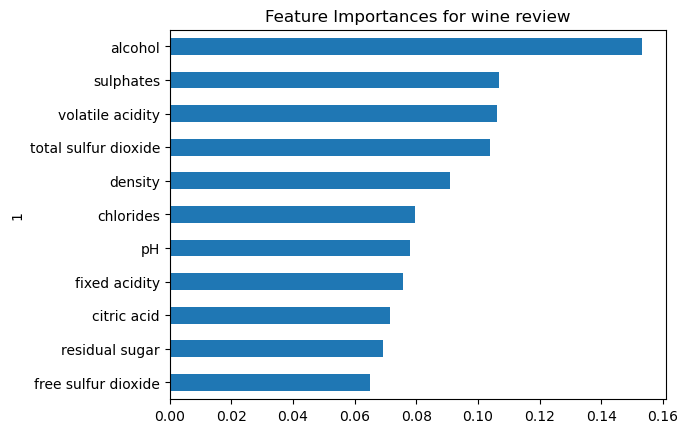

In [41]:
# horizontal bar chart
importantFeaturesDFSorted.plot(
    kind='barh',
    title='Feature Importances for wine review',
    legend=False
    )

## saving and manually testing the model

In [42]:
joblib.dump(rfModel, 'qualityWineModel_optimization.pkl')

['qualityWineModel_optimization.pkl']

In [43]:
#load the model back to the notebook
loaded_model = joblib.load('qualityWineModel_optimization.pkl')

In [44]:
#manually test the data to see if that makes sense
feature1 = 5.4
feature2 = 3.2
feature3 = 1.5
feature4 = 0.4
feature5 = 0.4
feature6 = 0.4
feature7 = 0.4
feature8 = 0.4
feature9 = 0.4
feature10 = 0.4
feature11= 0.4

In [45]:
input_data = [[feature1, feature2, feature3, feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11]]

In [46]:
predictions = loaded_model.predict(input_data)

In [47]:
print("Quality:", predictions[0])

Quality: 6


## Python-to-JavaScript conversion:ONNX (Open Neural Network Exchange) 

In [48]:
# Get the input shape from the RandomForestClassifier model
input_dim = loaded_model.n_features_in_

In [49]:
#To use a scikit-learn model in a JavaScript website, you'll need to convert it to a format compatible with JavaScript. 
# use a Python-to-JavaScript conversion tool like 
#ONNX (Open Neural Network Exchange)

from skl2onnx import convert
from skl2onnx.common.data_types import FloatTensorType

# Convert the scikit-learn model to ONNX format
onnx_model = convert.convert_sklearn(loaded_model, initial_types=[('input', FloatTensorType([None, input_dim]))])

# Save the ONNX model as a .onnx file
with open('model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

C:\Users\Camilla\anaconda3\lib\site-packages\skl2onnx\algebra\onnx_ops.py:159: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  tys = obj.typeStr or ''
C:\Users\Camilla\anaconda3\lib\site-packages\skl2onnx\algebra\automation.py:154: UserWarning: OpSchema.FormalParameter.isHomogeneous is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.is_homogeneous instead.
  if getattr(obj, 'isHomogeneous', False):
C:\Users\Camilla\anaconda3\lib\site-packages\jinja2\environment.py:471: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  return getattr(obj, attribute)
